## Multivariable Linear Regression : PyTorch

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

### Step 1. Data

In [ ]:
x_data = torch.FloatTensor([[73., 80., 75.],
          [93., 88., 93.],
          [89., 91., 90.],
          [96., 98., 100.],
          [73., 66., 70.]])
y_data = torch.FloatTensor([[152.],
          [185.],
          [180.],
          [196.],
          [142.]])

print(x_data.dim(), x_data.shape, y_data.dim(), y_data.shape)

2 torch.Size([5, 3]) 2 torch.Size([5, 1])


### Step 2. Linear Regression Model (input = 3, output = 1)

In [ ]:
class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel,self).__init__()
        self.linear = nn.Linear(3, 1)

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

model = LinearModel()

### Step 3. Loss,Optimizer, Metric

In [ ]:
criterion = nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

### Step 4. Train the model

In [ ]:
epochs = 100
cost = []
for epoch in range(epochs):
    y_pred = model(x_data) 
    loss = criterion(y_pred, y_data)
    
    optimizer.zero_grad() 
    loss.backward() 
    optimizer.step()

    cost.append(loss.item())

    if (epoch) % 10 == 0:
      print('Epoch {:4d}/{}  Cost: {:.6f}'.format(
            epoch, epochs, loss.item()))

Epoch    0/100  Cost: 62990.074219
Epoch   10/100  Cost: 2.388013
Epoch   20/100  Cost: 1.803623
Epoch   30/100  Cost: 1.795899
Epoch   40/100  Cost: 1.788217
Epoch   50/100  Cost: 1.780575
Epoch   60/100  Cost: 1.772971
Epoch   70/100  Cost: 1.765427
Epoch   80/100  Cost: 1.757881
Epoch   90/100  Cost: 1.750403


Print the updated weight W and bias b

In [ ]:
print('W = ', model.linear.weight)
print('b = ', model.linear.bias)

W =  Parameter containing:
tensor([[0.6579, 0.6668, 0.6905]], requires_grad=True)
b =  Parameter containing:
tensor([-0.3902], requires_grad=True)


Plot the Training loss

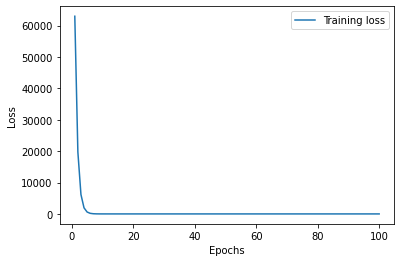

In [ ]:
epochs = np.arange(1, epochs+1)
plt.plot(epochs, cost, label='Training loss')
#plt.plot(epochs, history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Step 5. Test 

In [ ]:
x_test = torch.FloatTensor([[95., 100., 80]])
with torch.no_grad():
  y_pred = model(x_test)  # predicted output

print(y_pred)

tensor([[184.0284]])
